# Predicting Marketing Campaign Outcome of the Bank
<strong>Programming language:</strong> Python<br/>
<strong>Dataset source:</strong> UCI Machine Learning repository - [Bank Marketing Dataset][id].

[id]: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing "dataset"

## Overview
In this post, I will first perform exploratory data analysis, clean and preprocess the dataset, and then build a Logistic Regression, KNN, Decision Tree, Random Forest, and Gradient Boosting to predict marketing campaign outcome of a Portuguese banking institution. Also, I will analyze models results and give some future scopes.

## Project Background
<strong>Marketing Campaign</strong> is an important topic in every company, because it can help companies increase the number of clients. There are a great number of banks available throughout. Therefore, a bank has to start campaigns, attracting customers to subscribe its term deposit.

## Dataset Overview
The “Bank Marketing” dataset, which is downloaded from UCI Machine Learning repository, includes information about bank clients, last contact of the current campaign, previous marketing campaign, social and economic context attributes, and whether customers subscribe a term deposit or not. There are 41188 observations of 21 variables.


<strong>Bank client data</strong><br />
1.age <br />
2.job : type of job<br />
3.marital : marital status<br />
4.education<br />
5.default: has credit in default?<br />
6.housing: has housing loan?<br />
7.loan: has personal loan?<br /> 
<strong>Related with the last contact of the current campaign</strong><br />
8.contact: contact communication type <br />
9.month: last contact month of year <br />
10.day_of_week: last contact day of the week <br />
11.duration: last contact duration, in seconds<br />
<strong>Other attributes</strong><br />
12.campaign: number of contacts performed during this campaign and for this client<br /> 
13.pdays: number of days that passed by after the client was last contacted from a previous campaign<br /> 
14.previous: number of contacts performed before this campaign and for this client<br /> 
15.poutcome: outcome of the previous marketing campaign<br />
<strong>Social and economic context attributes</strong><br />
16.emp.var.rate: employment variation rate - quarterly indicator <br /> 
17.cons.price.idx: consumer price index - monthly indicator <br /> 
18.cons.conf.idx: consumer confidence index - monthly indicator <br /> 
19.euribor3m: euribor 3 month rate - daily indicator <br /> 
20.nr.employed: number of employees - quarterly indicator <br /> 
<strong>Target variables</strong><br />
21.y - has the client subscribed a term deposit?

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
# Call functions in bank_Utility.py
from bank_Utility import upper_outlier_percentage, create_pie, table_of_target_var, cat_to_dummy, cat_to_one_hot
from bank_Utility import delete_upper_outliers, ROC_curve, plot_top5_feature_importances

## Exploratory Data Analysis
### 1. Variable Identification

In [3]:
# Read Dataset
df = pd.read_csv('https://query.data.world/s/ltwy4ot54gw6miz7zcx7czarfyhwli', sep=';')

# Usie head function to show limited values of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Examine variables, data types, number of columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There is total 41188 data.

### 2. Univariate Analysis
#### a) Target variable
I created a pie chart for the target variable since it is categorical data and has only two categories (yes/no).

Text(0.5, 1.0, 'Pie Chart of y')

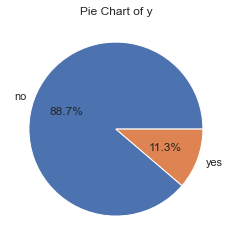

In [5]:
# Categorical variable: y
sns.set(style="darkgrid")
create_pie(df, "y")
plt.title("Pie Chart of y")

From the pie chart, we can tell that the success rate of the marketing campaign is 11.3%.
#### b) Bank client data
For a numerical variable, I showed a histogram, a boxplot, and a statistical detail. For categorical variables, I made bar charts and pie charts.

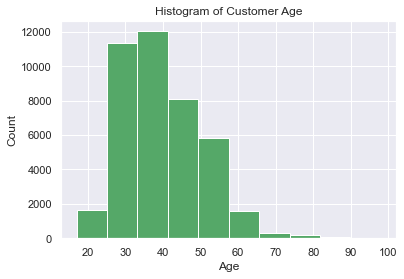

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


In [6]:
# Numerical variable: age
plt.hist(df['age'], bins=10, color="g")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Customer Age")
plt.show()
df[['age']].describe()

From the histogram and statistical detail above, we can tell that the distribution of customer age is right-skewed, ranging from 17 to 98.
Also, the boxplot below showed outliers of "age", accounting for 1.14% of the dataset. Thus, I decided to delete those outliers data directly.

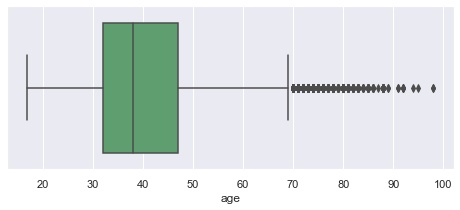

age has 1.14% outliers.


In [7]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df["age"], color='g')
plt.show()
     
# Use the function to calculate % of Age outliers
upper_outlier_percentage(df, "age")

Text(0.5, 1.0, 'Bar Chart of Customer Job')

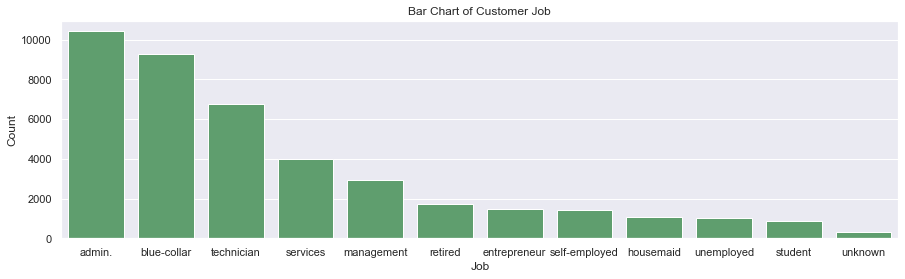

In [8]:
# Categorical variable: job
plt.figure(figsize=(15, 4))
sns.countplot(x="job", data=df, color="g", order = df['job'].value_counts().index)
plt.xlabel("Job")
plt.ylabel("Count")
plt.title('Bar Chart of Customer Job')

From the bar chart above, we can tell that there are 12 types of "job" and "admin" accounted for the largest part, followed by "blue-collar," "technician," and "services."

Text(0.5, 1.0, 'Bar Chart of Customer Marital Status')

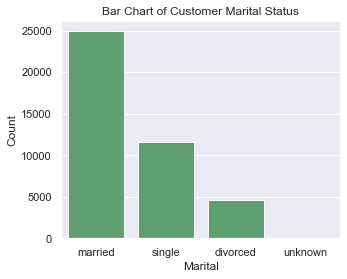

In [9]:
# Categorical variable: marital
plt.figure(figsize=(5, 4))
sns.countplot(x="marital", data=df, color="g", order = df['marital'].value_counts().index)
plt.xlabel("Marital")
plt.ylabel("Count")
plt.title('Bar Chart of Customer Marital Status')

From the bar chart above, we can tell that there are 4 types of "marital." More than half of the clients are married.

Text(0.5, 1.0, 'Bar Chart of Customer Education')

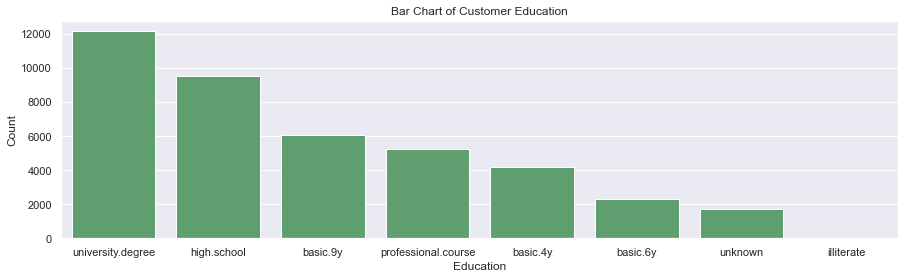

In [10]:
# Categorical variables: education
plt.figure(figsize=(15, 4)) 
sns.countplot(x="education", data=df, color="g", order = df['education'].value_counts().index).set(ylabel=None)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title('Bar Chart of Customer Education')

From the bar chart above, we can tell that there are 8 types of "education." Most of the customers have university degree.


Text(0.5, 1.0, 'Pie Chart of Personal Loan')

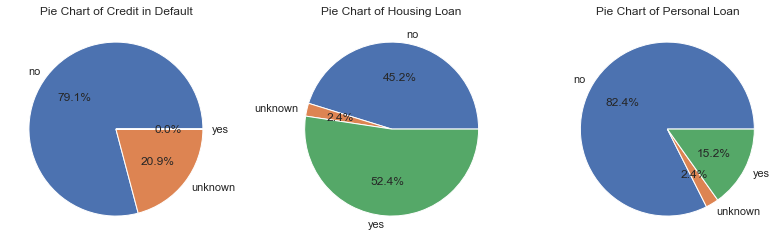

In [11]:
# Categorical variables
plt.figure(figsize=(14, 4))

# default
plt.subplot(1, 3, 1) 
create_pie(df, "default")
plt.title("Pie Chart of Credit in Default")
 
# housing
plt.subplot(1, 3, 2)
create_pie(df, "housing")
plt.title("Pie Chart of Housing Loan")

# loan
plt.subplot(1, 3, 3) 
create_pie(df, "loan")
plt.title("Pie Chart of Personal Loan")

From the pie charts above, we can tell that 79.1% of customers have no credit in default, 52.4% of customers have housing loans, and 15.2% of customers have personal loans.

#### c) Data related with the last contact of the current campaign

From the charts above, we can tell that four variables seem to have outliers. Thus, we would like to explore in more detail.


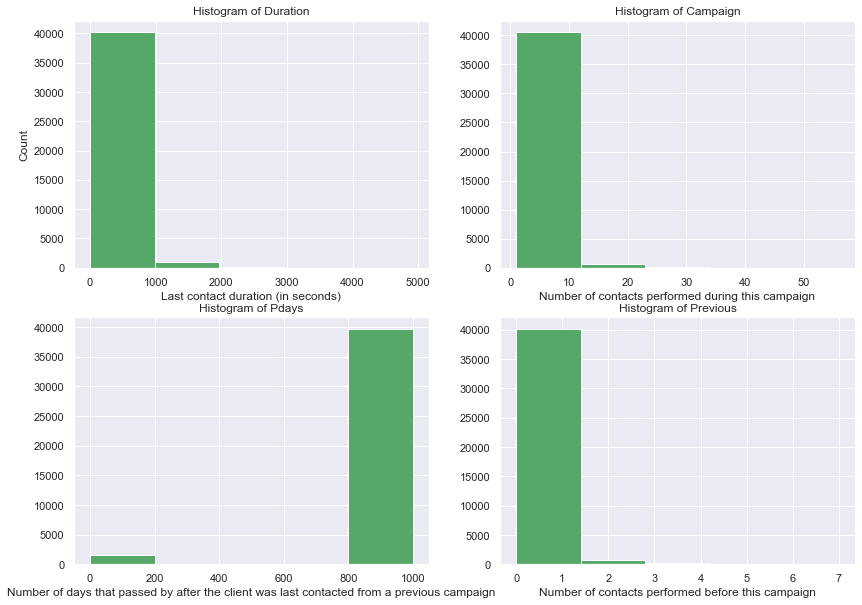

In [12]:
# Numerical variables
plt.figure(figsize=(14, 10))

# duration
plt.subplot(2, 2, 1)
plt.hist(df['duration'], bins=5, color="g")
plt.xlabel("Last contact duration (in seconds)")
plt.ylabel("Count")
plt.title("Histogram of Duration")

# campaign
plt.subplot(2, 2, 2)
plt.hist(df['campaign'], bins=5, color="g")
plt.xlabel("Number of contacts performed during this campaign")
plt.title("Histogram of Campaign")

# pdays
plt.subplot(2, 2, 3)
plt.hist(df['pdays'], bins=5, color="g")
plt.xlabel("Number of days that passed by after the client was last contacted from a previous campaign")
plt.title("Histogram of Pdays")

# previous
plt.subplot(2, 2, 4)
plt.hist(df['previous'], bins=5, color="g")
plt.xlabel("Number of contacts performed before this campaign")
plt.title("Histogram of Previous")

plt.show()

In [13]:
# Summary number
df[['duration', 'campaign', 'pdays', 'previous']].describe()

,duration,campaign,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,962.475454,0.172963
std,259.279249,2.770014,186.910907,0.494901
min,0.000000,1.000000,0.000000,0.000000
25%,102.000000,1.000000,999.000000,0.000000
50%,180.000000,2.000000,999.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000
max,4918.000000,56.000000,999.000000,7.000000


In terms of "duration," since this attribute highly affects the output target (e.g., if duration=0 then y='no'), I decided to remove this column when building models to have a realistic predictive model.

In terms of "campaign," it ranges from 1 to 56 and the mean is 2.56. Since the outliers are nearly 6%, I decided to keep these values instead of deleting. Perhaps in the future, I can rescale the data using such as RobustScaler().

In [14]:
# campaign outliers
upper_outlier_percentage(df, "campaign")

campaign has 5.84% outliers.


Regarding "pdays," value 999 is recorded when a client was not previously contacted. Yet, since 96.32% of data is recorded as 999, I decided to discard this column when predicting.

In [15]:
# pdays = 999
pdays_999 = len(df[df['pdays'] == 999])
pdays_999_per = pdays_999 / len(df)
pdays_999_per = "{:.2%}".format(pdays_999_per)
print(f' pdays has {pdays_999_per} data recorded as 999.')

 pdays has 96.32% data recorded as 999.


Regarding "previous," it ranges from 0 to 7 and the mean is 0.173. Since the outliers are around 13.66%, I decided to keep these values. Perhaps in the future, I can separate them into another subset, building another model for those outliers.

In [16]:
# previous outliers
upper_outlier_percentage(df, "previous")

previous has 13.66% outliers.


Text(0.5, 1.0, 'Bar Chart of the Last Contact Day of the Week')

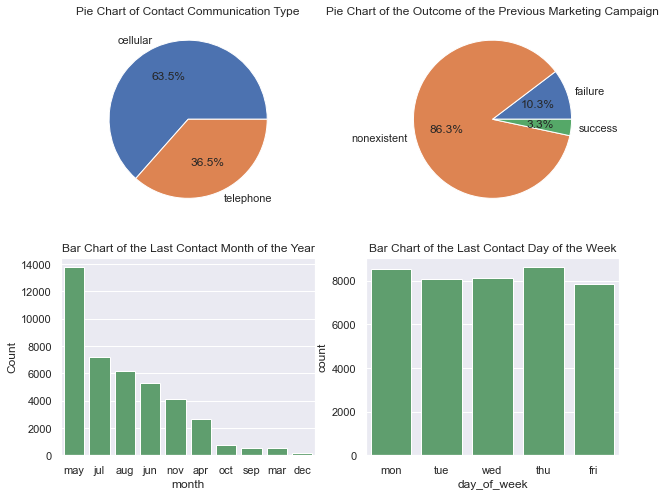

In [17]:
# Categorical variables
plt.figure(figsize=(10, 8))

# contact
plt.subplot(2, 2, 1) 
create_pie(df, "contact")
plt.title("Pie Chart of Contact Communication Type")

# poutcome
plt.subplot(2, 2, 2) 
create_pie(df, "poutcome")
plt.title("Pie Chart of the Outcome of the Previous Marketing Campaign")

# month
plt.subplot(2, 2, 3) 
sns.countplot(x="month", data=df, color="g", order = df['month'].value_counts().index)
plt.ylabel("Count")
plt.title('Bar Chart of the Last Contact Month of the Year')

# day_of_week
plt.subplot(2, 2, 4) 
sns.countplot(x="day_of_week", data=df, color="g")
plt.title('Bar Chart of the Last Contact Day of the Week')

From the pie charts above, we can tell that 63.5% of contact communication types are cellular, and for the outcome of the previous marketing campaign, failure is three times of success.<br />
From the bar charts above, we can tell that most of "the last contact month of the year" is May and there is no "Jan" and "Feb." Also, it seems like the distribution of "the last contact day of the week" is equal.

#### d) Social and economic context attributes

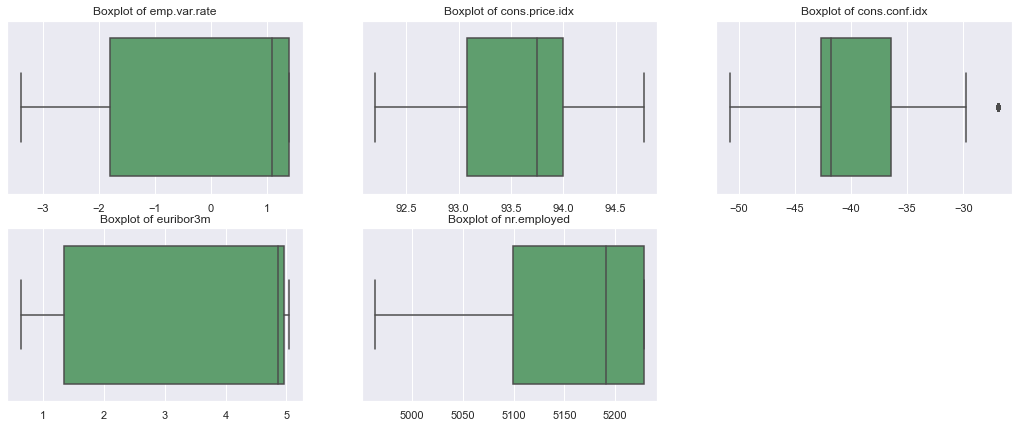

In [18]:
var = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
i=1
plt.figure(figsize=(18, 7))
for x in var:
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[x], color='g').set(xlabel=None)
    plt.title("Boxplot of {}".format(x))
    i=i+1

From the boxplots above, we can tell that only "cons.conf.idx" has outliers. Below we explored it in detail.

In [19]:
# cons.conf.idx summary number
df[['cons.conf.idx']].describe()

,cons.conf.idx
count,41188.000000
mean,-40.502600
std,4.628198
min,-50.800000
25%,-42.700000
50%,-41.800000
75%,-36.400000
max,-26.900000


In [20]:
# cons.conf.idx outliers
upper_outlier_percentage(df, "cons.conf.idx")

cons.conf.idx has 1.09% outliers.


We can tell that "cons.conf.idx" ranges from -50.8 to -26.9 and the outliers are around 1%. Thus, I decided to delete those outliers directly since our dataset is big.

### 3. Bi-variate Analysis
#### a) Categorical & Numerical variable
I used the target variable (categorical) and some numerical variables to build boxplots. 

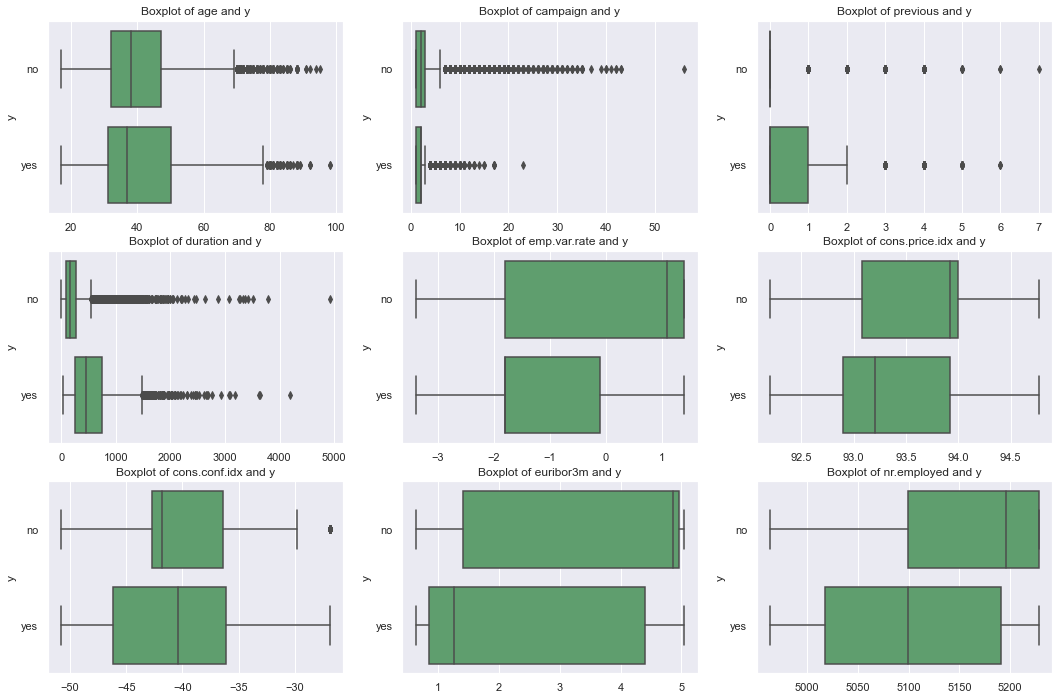

In [21]:
num_var = ['age', 'campaign', 'previous', 'duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
i=1
plt.figure(figsize=(18, 12))
for x in num_var:
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[x], y=df['y'], color='g').set(xlabel=None)
    plt.title("Boxplot of {} and y".format(x))
    i=i+1

From the charts above, I observed that in terms of "euribor3m" and "nr.employed," the median (Q2) of "yes" is much smaller than the median of "no." Thus, I assumed that these two variables may effect the campaign outcome. 
#### b) Numerical & Numerical variable
To examine the relationship between two numerical variables, I made a correlation matrix.

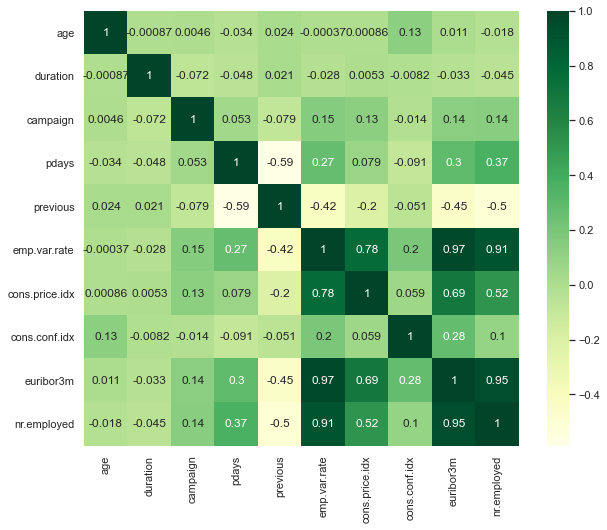

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap="YlGn", square=True) 
plt.show()

From the heatmap above, I found that "emp.var.rate" has strong positive relationships with "cons.conf.idx," "euribor3m," and "nr.employed," and "euribor3m" has a strong positive relationship with "nr.employed." Overall, there are high correlations between four columns: emp.var.rate, cons.price.idx, euribor3m, and nr.employed.
#### c) Categorical & Categorical variable
For categorical and categorical variables, I created <strong>100% stacked bar charts.</strong>

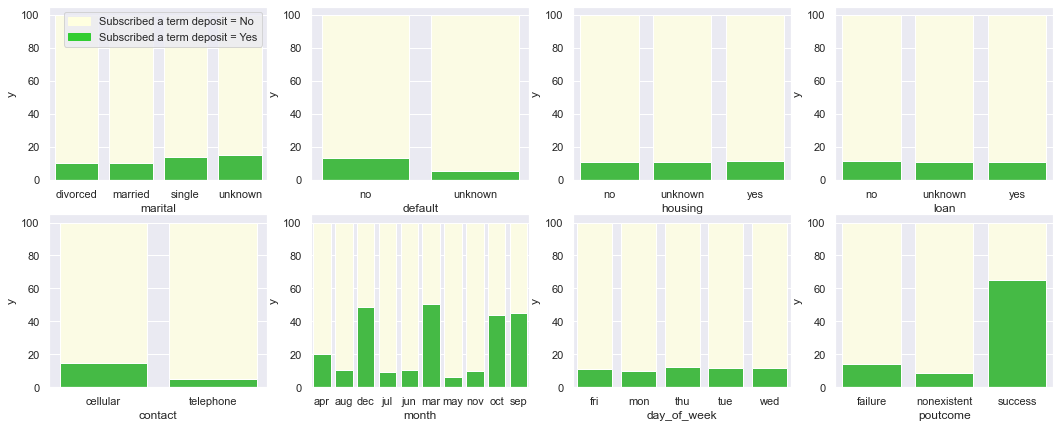

In [23]:
cat_var = ['marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
i=1
plt.figure(figsize=(18, 7))
for x in cat_var:
    plt.subplot(2, 4, i)
    # from raw value to percentage
    total = df.groupby(x)['y'].count().reset_index()
    subscribed = df[df.y=='yes'].groupby(x)['y'].count().reset_index()
    
    subscribed['y'] = [i / j * 100 for i, j in zip(subscribed['y'], total['y'])]
    total['y'] = [i / j * 100 for i, j in zip(total['y'], total['y'])]
    
    # Top bars: group of y (subscribed) = no
    top_bar = sns.barplot(x=x,  y="y", data=total, color='lightyellow')
    # Bottom bars: group of y (subscribed) = yes
    bottom_bar = sns.barplot(x=x, y="y", data=subscribed, color='limegreen')
    
    # Add legend in the first plot
    if i ==1:
        top_leg = mpatches.Patch(color='lightyellow', label='Subscribed a term deposit = No')
        bottom_leg = mpatches.Patch(color='limegreen', label='Subscribed a term deposit = Yes')
        plt.legend(handles=[top_leg, bottom_leg])
        
    i=i+1

From the charts above, we can see that for "contact", Cellular has higher subscription rate, and for "month," April, December, March, October, and September have higher subscription rates. Also, regarding "poutcome" (outcome of the previous marketing campaign), "success" has much higher subscription rate than "failure."

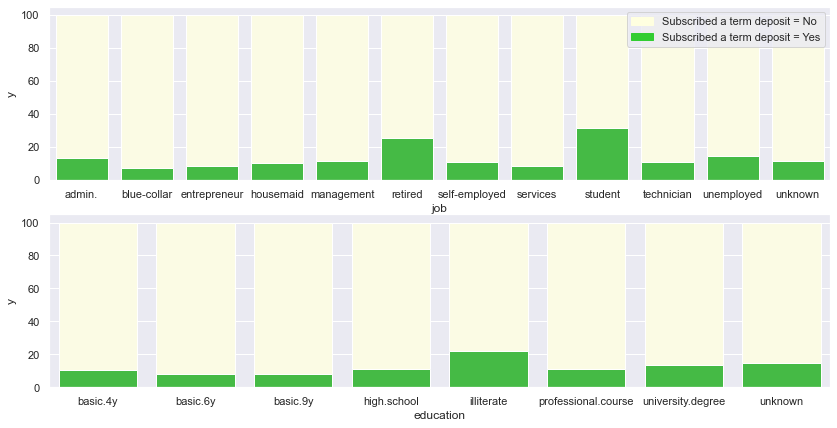

In [24]:
cat_var2 = ['job', 'education']
j=1
plt.figure(figsize=(14, 7))
for x in cat_var2:
    plt.subplot(2, 1, j)
    # from raw value to percentage
    total = df.groupby(x)['y'].count().reset_index()
    subscribed = df[df.y=='yes'].groupby(x)['y'].count().reset_index()
    
    subscribed['y'] = [i / j * 100 for i, j in zip(subscribed['y'], total['y'])]
    total['y'] = [i / j * 100 for i, j in zip(total['y'], total['y'])]
    
    # Top bars: group of y (subscribed) = no
    top_bar = sns.barplot(x=x,  y="y", data=total, color='lightyellow')
    # Bottom bars: group of y (subscribed) = yes
    bottom_bar = sns.barplot(x=x, y="y", data=subscribed, color='limegreen')
    
    # Add legend in the first plot
    if j ==1:
        top_leg = mpatches.Patch(color='lightyellow', label='Subscribed a term deposit = No')
        bottom_leg = mpatches.Patch(color='limegreen', label='Subscribed a term deposit = Yes')
        plt.legend(handles=[top_leg, bottom_leg])
        
    j=j+1

From the charts above, we can see that "retired," "student," and "illiterate" have higher subscription rates.

## Data Cleaning and Preprocessing
### 1. Outlier Treatment
In previous univariate analysis, I decided to delete outliers of "age" and "cons.conf.idx" directly because they only accounted for about 1% of the dataset.

In [25]:
cleaned_df = delete_upper_outliers(df, "age")
cleaned_df = delete_upper_outliers(cleaned_df, "cons.conf.idx")
cleaned_df.shape

(40327, 21)

### 2. Missing Value Treatment
As we can see, there is no missing value needed to be treated.

In [26]:
# Check whether there are any null values in the data set
print(df.isnull().values.any())

# Summation of missing values in the data set
print(df.isnull().sum().sum())

False
0


### 3. Delete Features
As I mentioned before, columns "pdays" and "duration" have to be removed when building models.

In [27]:
cleaned_df = cleaned_df.drop(['pdays', 'duration'], axis=1)
cleaned_df.shape

(40327, 19)

### 4. Convert Data Type
I changed columns with 'yes' and 'no' values to Boolean columns.

In [28]:
# yes/no column
cleaned_df['y'].value_counts()

no     36068
yes     4259
Name: y, dtype: int64

In [29]:
cleaned_df['y'] = [0 if i == "no" else 1 for i in cleaned_df['y']]

# Boolean column
cleaned_df['y'].value_counts()

0    36068
1     4259
Name: y, dtype: int64

### 5. Separate X and y variables

In [30]:
X = cleaned_df.drop(columns = 'y')
y = cleaned_df[['y']]
y = y.values.ravel()

### 6. Split Training and Test
I split dataset into 70% training and 30% test.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

### 7. Dummy Variables & One Hot Encoding for X

1.For logistic regression, I converted categorical independent variables into dummy variables to avoid the dummy variable trap.

In [32]:
cate_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

X_lr_train = X_train
X_lr_train = cat_to_dummy(cate_col, X_lr_train)
X_lr_test = X_test
X_lr_test = cat_to_dummy(cate_col, X_lr_test)

2.For models other than logistic regression, I used one-hot encoding.

In [33]:
X_train = cat_to_one_hot(cate_col, X_train)
X_test = cat_to_one_hot(cate_col, X_test)

### 8. Balance Training Dataset
Since the training dataset is imbalanced, which has 25239 '0' and 2989 '1', I used SMOTE function to oversample a minority class.

In [34]:
table_of_target_var(y_train)
print("Total observations in the training dataset:", len(y_train))

[[    0 25239]
 [    1  2989]]
Total observations in the training dataset: 28228


In [35]:
SMOTE = SMOTE(random_state=2021)

X_lr_train, y_lr_train = SMOTE.fit_resample(X_lr_train, y_train)
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

After oversampling, we have 25239 '0' and 25239 '1' in the training datasets.

In [36]:
table_of_target_var(y_train)
print("After oversampling, total observations in the training dataset: ", len(y_train))

[[    0 25239]
 [    1 25239]]
After oversampling, total observations in the training dataset:  50478


### 9. Feature Scaling
To predict using KNN (K-Nearest Neighbors), which is a distance-based algorithm, I used StandardScaler function to rescale X. Note that I only used transform() on the test data because I used the scaling paramaters learned on the training data to scale the test data.

In [37]:
# Standardizes X for KNN mdoel
scaler = StandardScaler()
scaler.fit(X_train)
X_knn_train = scaler.transform(X_train)
X_knn_test = scaler.transform(X_test)

## Data Modeling

### 1. Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=10000)
LR.fit(X_lr_train, y_lr_train)

LogisticRegression(max_iter=10000)

### 2. KNN
#### a) Find Optimal Hyperparameters
I used GridSearchCV function to find optimal hyperparameters. GridSearchCV performs cross-validation and helps to loop through predefined hyperparameters and fit estimator (model) on the training dataset. Thus, in the end, I can select the best parameters from the listed hyperparameters.

In [39]:
# Tuning Models with GridSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()

params = {"n_neighbors": np.arange(5,10), "metric": ["euclidean", "cityblock"]}
grid_knn = GridSearchCV(estimator=knn, param_grid=params)
grid_knn.fit(X_knn_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cityblock'],
                         'n_neighbors': array([5, 6, 7, 8, 9])})

In [40]:
# Print Optimal KNN
print(grid_knn.best_score_)
print(grid_knn.best_estimator_.n_neighbors)
print(grid_knn.best_estimator_.metric)

0.926780992614536
6
cityblock


#### b) Use Optimal Hyperparameters

In [41]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=6, metric='cityblock')
KNN.fit(X_knn_train, y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=6)

### 3. Decision Tree
#### a) Find Optimal Hyperparameters

In [42]:
# Tuning Models with GridSearchCV

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : list(range(5, 10)),
}

grid_dt = GridSearchCV(DT, param_grid=params)
grid_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9]})

In [43]:
# Print Optimal DT
print(grid_dt.best_score_)
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)

0.8607522376566831
{'criterion': 'gini', 'max_depth': 9}
DecisionTreeClassifier(max_depth=9)


#### b) Use Optimal Hyperparameters

In [44]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=9)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

### 4. Random Forest (Bagging)
#### a) Find Optimal Hyperparameters

In [45]:
# Tuning Models with GridSearchCV

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

params = {
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [10, 100, 1000]
}

grid_rf = GridSearchCV(rf, param_grid=params)
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]})

In [46]:
# Print Optimal RF1
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

0.9370037064684231
{'max_features': 'sqrt', 'n_estimators': 1000}
RandomForestClassifier(max_features='sqrt', n_estimators=1000)


#### b) Use Optimal Hyperparameters

In [47]:
RF = RandomForestClassifier(max_features="sqrt", n_estimators=1000)
RF.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=1000)

### 5. Gradient Boosting (Boosting)
#### a) Find Optimal Hyperparameters

In [48]:
# Tuning Models with GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

params = {
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [10, 100, 1000]
}

grid_gb = GridSearchCV(gb, param_grid=params)
grid_gb.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]})

In [49]:
# Print Optimal GB1
print(grid_gb.best_score_)
print(grid_gb.best_params_)
print(grid_gb.best_estimator_)

0.9256925138286123
{'max_features': 'sqrt', 'n_estimators': 1000}
GradientBoostingClassifier(max_features='sqrt', n_estimators=1000)


#### b) Use Optimal Hyperparameters

In [50]:
# Use Optimal Hyperparameters
GB = GradientBoostingClassifier(max_features="sqrt", n_estimators=1000)
GB.fit(X_train, y_train)

GradientBoostingClassifier(max_features='sqrt', n_estimators=1000)

## Predic on Test Data

In [51]:
LR_pred = LR.predict(X_lr_test)
KNN_pred = KNN.predict(X_knn_test)
DT_pred = DT.predict(X_test)
RF_pred = RF.predict(X_test)
GB_pred = GB.predict(X_test)

## Evaluate Models using Metrics

### 1. Classification Report

In [52]:
from sklearn.metrics import accuracy_score, classification_report

print('Logistic Regression Report:')
print(classification_report(y_test, LR_pred))

print('KNN Report:')
print(classification_report(y_test, KNN_pred))

print('Decision Tree Report:')
print(classification_report(y_test, DT_pred))

print('Random Forest Report:')
print(classification_report(y_test, RF_pred))

print('Gradient Boosting Report:')
print(classification_report(y_test, GB_pred))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10829
           1       0.30      0.41      0.35      1270

    accuracy                           0.84     12099
   macro avg       0.61      0.65      0.63     12099
weighted avg       0.86      0.84      0.85     12099

KNN Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10829
           1       0.40      0.40      0.40      1270

    accuracy                           0.87     12099
   macro avg       0.66      0.67      0.67     12099
weighted avg       0.87      0.87      0.87     12099

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10829
           1       0.48      0.41      0.44      1270

    accuracy                           0.89     12099
   macro avg       0.70      0.68      0.69     12099
weighted avg

To compare the performances of the different models, I built classification reports. We can see that in terms of accuracy, three tree-based models performed better, 89%-90%. Yet, since the dataset is imbalanced, we may need to examine f1 score instead. <br />
As we can see, Decision Tree has the highest f1 score, 44%. If we focus on the True Positive Rate (correctly predicted customers to subscribe a term deposit), we can see that Decision Tree and Logistic Regression have higher Recall, 41%. <br />
On the other hand, if we focus on the False Positive (Type-I error) that the prediction is positive (subscribed) but the actual is negative (not subscribed), we may want to have a higher Precision. From the reports, we can see that Gradient Boosting has the highest precision, 56%, and Random Forest has the second highest precision, 49%. <br />

Recall = $ \frac{TP}{TP+FN} $;   Precision = $ \frac{TP}{TP+FP} $ <br />

### 2. ROC Curve
In ROC curves, True Positive Rate is normally plotted on the Y axis, while False Positive Rate is plotted on the X axis. The ideal point is in the top left corner of the map, with a FPR of zero and a TPR of one. Thus, a greater region under the curve (AUROC) is generally preferable.

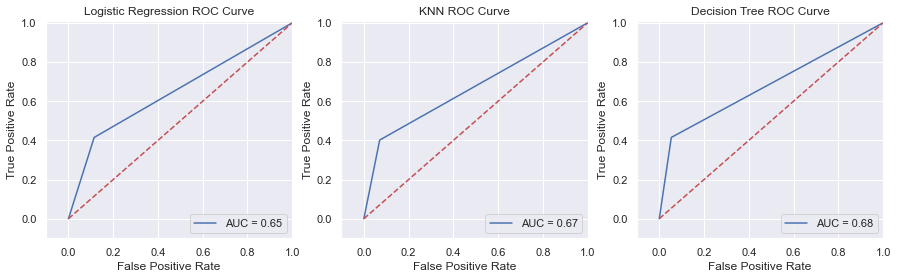

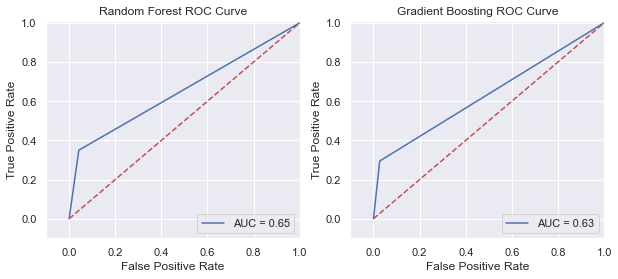

In [53]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
ROC_curve(y_test, LR_pred)
plt.title("Logistic Regression ROC Curve")
            
plt.subplot(1, 3, 2)
ROC_curve(y_test, KNN_pred)
plt.title("KNN ROC Curve")

plt.subplot(1, 3, 3)
ROC_curve(y_test, DT_pred)
plt.title("Decision Tree ROC Curve")
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
ROC_curve(y_test, RF_pred)
plt.title("Random Forest ROC Curve")

plt.subplot(1, 2, 2)
ROC_curve(y_test, GB_pred)
plt.title("Gradient Boosting ROC Curve")
plt.show()

From the charts above, we can tell that Decision Tree has the highest AUROC, 68%. 

## Features Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. Below for three tree-based models, I made bar charts of the Top 5 feature importances.

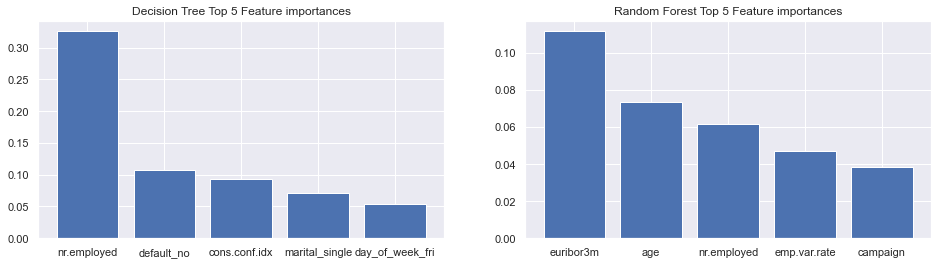

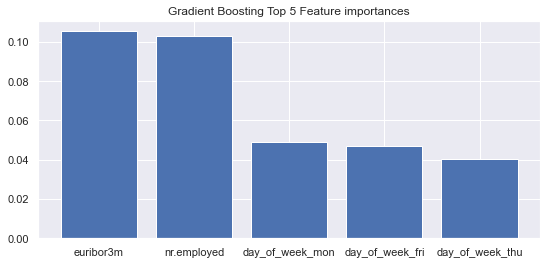

In [54]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plot_top5_feature_importances(X_train, DT.feature_importances_)
plt.title('Decision Tree Top 5 Feature importances')

plt.subplot(1, 2, 2)
plot_top5_feature_importances(X_train, RF.feature_importances_)
plt.title('Random Forest Top 5 Feature importances')
plt.show()

plt.figure(figsize=(9, 4))

plot_top5_feature_importances(X_train, GB.feature_importances_)
plt.title('Gradient Boosting Top 5 Feature importances')
plt.show()

From the Top 5 Feature importances plots above, we can tell that based on these three models, variables such as "nr.employed" (number of employees), "euribor3m" (euribor 3 month rate), and "day_of_week" (last contact day of the week) are significant when prediciting campaign outcome.

## Conclusion

Model|Accuracy|F1 score|Recall (TPR)|TNR|Precision|AUROC
-----|-----|-----|-----|-----|-----|-----
**Logistic Regression**|0.84|0.35|0.41|0.89|0.30|0.65
**KNN**|0.87|0.40|0.40|0.93|0.40|0.67
**Decision Tree**|0.89|0.44|0.41|0.95|0.48|0.68
**Random Forest**|0.89|0.41|0.35|0.96|0.49|0.65
**Gradient Boosting**|0.9|0.39|0.29|0.97|0.56|0.63

Overall, I found that tree-based models performed better and that even after oversampling on the minority class in the training dataset, the TPR (recall of '1') is still not as high as the TNR (recall of '0'). Thus, in the future, to improve the TPR of the models, we can try the following things: <br />
1. Deal with outliers: So far, we have deleted outliers of "age" and "cons.conf.idx" directly, because they only accounted for about 1% of the dataset. Yet, there are still around 6% outliers in "campaign" and around 14% outliers in "previous". Thus, to treat them, perhaps we can rescale the "cons.conf.idx" data and separate outliers of "previous" into another subset to build another model for those outliers.<br />
2. Balanced training dataset using different methods: in the project, we used SMOTE function to oversample the minority class. Perhaps in the future, we can also try to use both oversampling and undersampling, or ADASYN (Adaptive Synthetic) algorithm to create a balanced training dataset.

## References
Brownlee, J. (2020, April 1). <em>Gradient Boosting with Scikit-Learn, XGBoost, LightGBM, and CatBoost</em>. Retrieved from https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/ <br />
Brownlee, J. (2020, January 17). <em>SMOTE for Imbalanced Classification with Python</em>. Retrieved from https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/<br />
Chen, L. (2019, January 2). <em>Basic Ensemble Learning (Random Forest, AdaBoost, Gradient Boosting)- Step by Step Explained</em>. Retrieved from https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725<br />
Oversampling with SMOTE and ADASYN. (n.d.). Retrieved from https://www.kaggle.com/residentmario/oversampling-with-smote-and-adasyn